## 0. Imports

In [59]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from matplotlib import gridspec

## 1.0 Load data

In [8]:
data = pd.read_csv('datasets/kc_house_data.csv')

## 2.0 Functions

In [13]:
def get_data(path):
    data = pd.read_csv(path)
    return data    

def show_dtypes (data):
    print(data.dtypes)
    return None

def show_dimensions( data ):
    print( 'Number of Rows:{}'.format( data.shape[0] ) )
    print( 'Number of Columns {}'.format( data.shape[1] ) )
    return None

## 3.0 Data dimensions

In [10]:
print ( 'Number of Rows:{}'.format( data.shape[0] ) )
print( 'Number of Columns {}'.format( data.shape[1] ) )

Number of Rows:21613
Number of Columns 21


In [21]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dormitory_type'],
      dtype='object')

## 4.0 Data types

In [14]:
show_dtypes(data)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## 5.0 New Features

In [15]:
## format date

data['date'] = pd.to_datetime( data['date'] )

In [16]:
## format attributes

num_attributes = data.select_dtypes( include=['int64', 'float64'] )

In [17]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 6.0 Descriptive statistical

In [24]:
# tendency (mean e median)
pd.set_option('display.float_format', lambda x:'%.3f' % x)
media = pd.DataFrame( num_attributes.apply( np.mean ) )
mediana = pd.DataFrame( num_attributes.apply( np.median ) )

# dispersion (std, min, max)
std = pd.DataFrame( num_attributes.apply( np.std ) )
max_ = pd.DataFrame( num_attributes.apply( np.max ) )
min_ = pd.DataFrame( num_attributes.apply( np.min ) )

df1 = pd.concat( [max_, min_, media, mediana, std ], axis=1 ).reset_index()
df1.columns = ['attributes', 'mean', 'median', 'std', 'max', 'min']
df1

,attributes,mean,median,std,max,min
0,id,9900000190.000,1000102.000,4580301520.865,3904930410.000,2876499023.428
1,price,7700000.000,75000.000,540088.142,450000.000,367118.703
2,bedrooms,33.000,0.000,3.371,3.000,0.930
3,bathrooms,8.000,0.000,2.115,2.250,0.770
4,sqft_living,13540.000,290.000,2079.900,1910.000,918.420
5,sqft_lot,1651359.000,520.000,15106.968,7618.000,41419.553
6,floors,3.500,1.000,1.494,1.500,0.540
7,waterfront,1.000,0.000,0.008,0.000,0.087
8,view,4.000,0.000,0.234,0.000,0.766
9,condition,5.000,1.000,3.409,3.000,0.651


## 7.0 Data dimensions

In [ ]:
# dimension (df1)
data['dormitory_type'] = 'NA'
for i in range( len( data ) ):
        if data.loc[i, 'bedrooms'] == 1:
            data.loc[i, 'dormitory_type'] = 'studio'
        elif data.loc[i, 'bedrooms'] == 2:
            data.loc[i, 'dormitory_type'] = 'apartment'
        else:
            data.loc[i, 'dormitory_type'] = 'house'

# dimension (data)
            
            data ['level'] = 'NA'
for i in range( len( data ) ):
        if data.loc[i, 'price'] <= 321950:
            data.loc[i, 'level'] = 0
        elif ( data.loc[i,'price'] > 321950 ) & ( data.loc[i,'price'] <= 450000):
            data.loc[i, 'level'] = 1
        elif ( data.loc[i,'price'] > 450000 ) & ( data.loc[i,'price'] <= 645000):
            data.loc[i, 'level'] = 2
        else:
            data.loc[i, 'level'] = 321950

## 8.0 Hypotheses 


### 8.1  H1: Imóveis que possuem vista para água, são 30% mais caros, na media.

In [45]:
mprice_by_waterfront = data[['waterfront', 'price']].groupby('waterfront').mean().reset_index()
mprice_by_waterfront['difference'] = mprice_by_waterfront['price'].diff(1)
mprice_by_waterfront['percent diff'] = mprice_by_waterfront['difference'] / mprice_by_waterfront['price']*100
mprice_by_waterfront

,waterfront,price,difference,percent diff
0,0,531563.600,NaN,NaN
1,1,1661876.025,1130312.425,68.014


<BarContainer object of 2 artists>

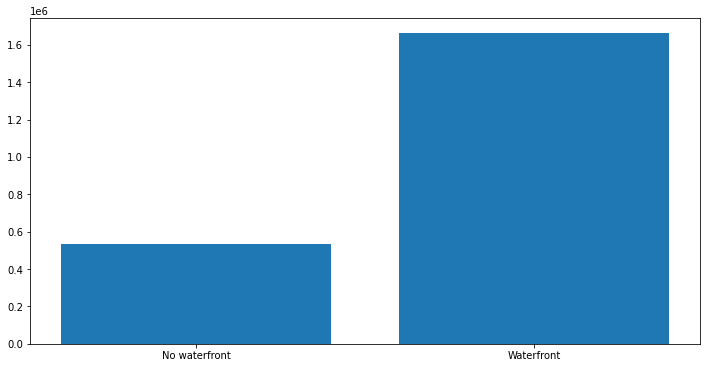

In [73]:
# graphic
plt.figure(figsize=(12,6))
plt.bar(['No waterfront','Waterfront'], meanprice_by_waterfront['price'])

### 5.2  H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média

In [32]:
# incluir coluna de False ou True
data['old_house'] = False

#anos anteriores que 1955 são True
data.loc[data['yr_built']<1955, 'old_house'] = True

#anos após 1955 são False
data.loc[data['yr_built']>=1955, 'old_house'] = False
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type,old_house
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,...,0,1955,0,98178,47.511,-122.257,1340,5650,house,False
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,...,400,1951,1991,98125,47.721,-122.319,1690,7639,house,True
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,...,0,1933,0,98028,47.738,-122.233,2720,8062,apartment,True
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,...,910,1965,0,98136,47.521,-122.393,1360,5000,house,False
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,...,0,1987,0,98074,47.617,-122.045,1800,7503,house,False


In [35]:
# media
m_prices = data[['old_house','price']].groupby('old_house').mean().reset_index()
m_prices.columns = ['old_house', 'mean_price']
m_prices

,old_house,mean_price
0,False,541299.968
1,True,537050.908


In [48]:
# comparar
m_prices['difference'] = m_prices['mean_price'].diff(1)
m_prices['percent diff'] = m_prices['difference'] / m_prices['mean_price']*100
m_prices

,old_house,mean_price,difference,Percent diff,percent diff
0,False,541299.968,NaN,NaN,NaN
1,True,537050.908,-4249.061,-0.791,-0.791


<BarContainer object of 2 artists>

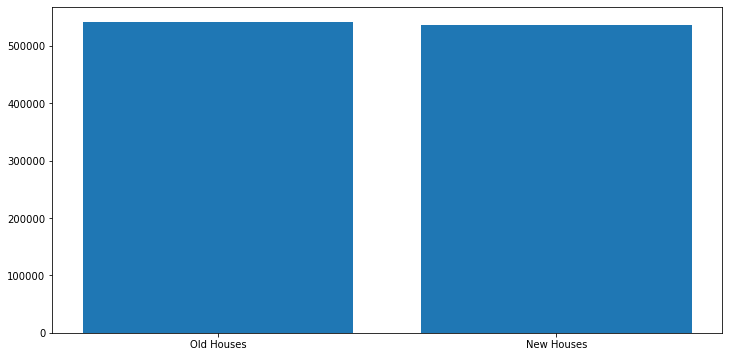

In [72]:
# graphic

plt.figure(figsize=(12,6))
plt.bar(['Old Houses','New Houses'], m_prices['mean_price'])

### 5.3  H3:Imóveis sem porão possuem sqrt_lot, são 50% maiores do que com porão.

In [50]:
# definir os que imóveis sem e com porão

h_basement    = data[data['sqft_basement']>0]
h_no_basement = data[data['sqft_basement']==0]

In [54]:
# mean

m_lot_hb  = h_basement['sqft_lot'].mean()
m_lot_hnb = h_no_basement['sqft_lot'].mean()

difference = m_lot_hnb - m_lot_hb
percent = difference*100/m_lot_hnb

print(str(percent)+'%')

18.409784757710298%


<BarContainer object of 2 artists>

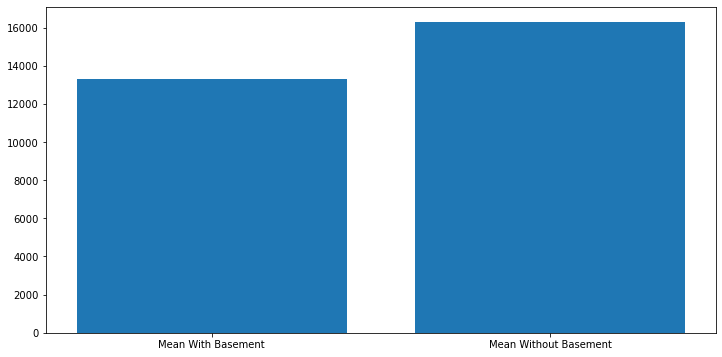

In [70]:
# grafich

plt.figure(figsize=(12,6))
plt.bar(['Mean With Basement','Mean Without Basement'], [m_lot_hb,m_lot_hnb])

### 5.4  H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%.

In [61]:
# date year

df = data[['date', 'price']].copy()
df['date_year'] = df['date'].dt.year

In [63]:
# mean year

mprice_year = df[['price', 'date_year']].groupby('date_year').mean().reset_index()
mprice_year['difference'] = mprice_year['price'].diff(1)
mprice_year['Percent diff'] = mprice_year['difference'] / mprice_year['price']*100
mprice_year

,date_year,price,difference,Percent diff
0,2014,539181.428,NaN,NaN
1,2015,541988.992,2807.564,0.518


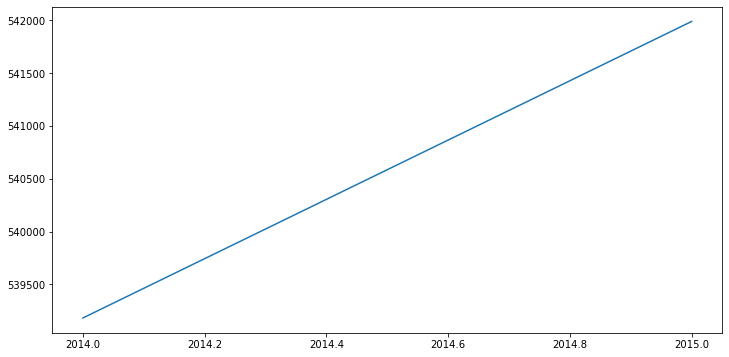

In [71]:
# graphic

plt.figure(figsize=(12,6))
plt.plot( mprice_year['date_year'], mprice_year['price'] )

### 5  H5: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ) de 15%.

In [65]:
df_monthly = data[['date', 'price', 'bathrooms']].copy()
df_monthly = df_monthly[df_monthly['bathrooms'] == 3]
df_monthly['date_monthly'] = df_monthly['date'].dt.strftime('%Y-%m')

# mean df_monthly

mprice_monthly_pct = df_monthly[['price', 'date_monthly']].groupby(['date_monthly']).mean().reset_index()
mprice_monthly_pct['pct_change'] = mprice_monthly_pct['price'].pct_change()*100
meanprice_monthly_pct

,date_monthly,price,pct_change
0,2014-05,690080.714,NaN
1,2014-06,775057.564,12.314
2,2014-07,741405.043,-4.342
3,2014-08,737576.562,-0.516
4,2014-09,645246.887,-12.518
5,2014-10,645523.015,0.043
6,2014-11,679910.465,5.327
7,2014-12,728341.188,7.123
8,2015-01,672923.171,-7.609
9,2015-02,696714.422,3.536


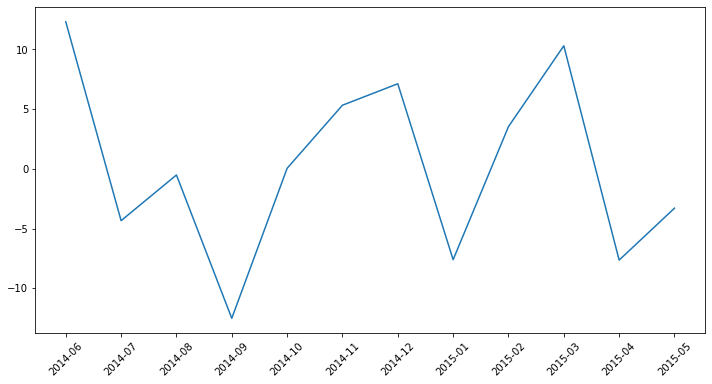

In [69]:
# graphic

plt.figure(figsize=(12,6))
plt.plot( mprice_monthly_pct['date_monthly'], mprice_monthly_pct['pct_change'] )
plt.xticks(rotation=45);